# PyTorch Framework

## Content

1. pyTorch: Einführung
    - Funtkionen
2. pyTorch Fundamentals: Tensors
    - pyTorch und Numpy 
3. Neuronale Netze in pyTorch
    - Ein simples neuronale Netz
    - MNIST Beispiel mit der Klasse nn.Module
    - MNIST Beispiel mit der Klasse nn.Sequential
4. Autograd: Berechnung der lokalen Ableitung
5. CNN in pyTorch
6. RNN in pyTorch

# 1. pyTorch: Einführung

- Eine ML Open-Source-Bibliothek für python
- Basiert auf in Lua geschriebene Bibliothek Torch
- Von dem Facebook-Forschungsteam für K.I. entwickelt 
- Erscheinungsjahr: 2016
- GPU sowie CPU 

## Funktionen

- GPU beschleunigte Tensor-Analyse
- Neuronale Netze auf Basis eines bandbasierten Autograd-Systems
- NumPy, SciPy und Cython sind dabei verwendbar
- Beim Deep Learning:
    * Viel Flexibilität
    * Hohe Geschwindigkeit

# 2. pyTorch Fundamentals: Tensors 

In [2]:
import torch
dtype = torch.float
device = torch.device("cpu")
torch.manual_seed(0) #Seed CPU

In [3]:
a = torch.randn(2,3,device=device, dtype=dtype)
a

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986]])

In [4]:
dtype = torch.int32

In [5]:
a = torch.randint(10, (2,3), device=device)
a

tensor([[ 6.,  9.,  8.],
        [ 6.,  6.,  8.]])

In [6]:
b = torch.randint(10, (2,3), device=device) 
b

tensor([[ 4.,  3.,  6.],
        [ 9.,  1.,  4.]])

In [7]:
a*b # Ausgabe einer Multiplikation der beiden Tensoren

tensor([[ 24.,  27.,  48.],
        [ 54.,   6.,  32.]])

In [8]:
a.sum()

tensor(43.)

In [9]:
a[1,2] # Ausgabe des Elements in der 3. Spalte der 2. Zeile

tensor(8.)

In [10]:
a.min()

tensor(6.)

In [11]:
if torch.cuda.is_available():
    print("Cuda is available")
    torch.cuda.manual_seed_all(0)

Cuda is available


## Tensors resizing

In [12]:
## Matrixenmultiplikation
torch.mm(a,b)

RuntimeError: size mismatch, m1: [2 x 3], m2: [2 x 3] at c:\programdata\miniconda3\conda-bld\pytorch_1524543037166\work\aten\src\th\generic/THTensorMath.c:2033

PyTorch bietet drei Instanzmethoden: [`reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape), [`resize_()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_) und [`view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view).

In [13]:
resh_b = b.reshape(3,-1)

In [14]:
res_b = b.resize(3,2)

C:\Users\dilet\Anaconda3\envs\torch\lib\site-packages\torch\tensor.py:255: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [15]:
b_view = b.view(3,2)

In [16]:
torch.mm(a,b_view)

tensor([[  86.,  131.],
        [  68.,  104.]])

## pyTorch und Numpy

### NumPy zu Torch

In [17]:
import numpy as np

In [18]:
np_array = np.ones((2,2))
np_array

array([[1., 1.],
       [1., 1.]])

In [19]:
torch_from_np = torch.from_numpy(np_array)
torch_from_np

tensor([[ 1.,  1.],
        [ 1.,  1.]], dtype=torch.float64)

**Hinweis:** Datentypen sind hier wichtig. Nicht alle Umwandlungen sind erlaubt:

In [20]:
np_array_new = np.ones((2, 2), dtype=np.int8)
torch.from_numpy(np_array_new)

TypeError: can't convert np.ndarray of type numpy.int8. The only supported types are: double, float, float16, int64, int32, and uint8.

Die **Umwandlung von NumPy zu Torch** ist nur zwischen den folgenden Datentypen erlaubt:

| NumPy        | Torch            |
| :-------------: |:--------------:|
| int64     | LongTensor |
| int32     | IntegerTensor |
| uint8      | ByteTensor      |
| float64 | DoubleTensor     |
| float32 | FloatTensor      |
| double | DoubleTensor      |

### Torch zu NumPy

In [21]:
torch_tensor = torch.randint(10,(2,2))
type(torch_tensor)

torch.Tensor

In [22]:
torch_to_numpy = torch_tensor.numpy()
type(torch_to_numpy)

numpy.ndarray

## Tensors und Gradienten - später!!

PyTorch bietet mit dem Parameter `requires_grad` die Möglichkeit, Gradienten zu einem bestimmten Tensor zu akkumulieren, d.h. eine Variable ist dann trainierbar

In [23]:
a = torch.ones((2,2), requires_grad=True)
a.requires_grad

True

In [24]:
a_no_grad = torch.ones(2,2)
b_no_grad = torch.ones(2,2)
b_no_grad.requires_grad

False

In [25]:
b = torch.randint(5,(2,2), requires_grad=True)
b.requires_grad

True

In [60]:
summe = a + b
print(summe.grad_fn)

In [64]:
#Summe ohne Gradienten zu berücksichtigen
print((a_no_grad+b_no_grad).grad_fn)

None


In [66]:
print(a * b)
print(torch.mul(a, b).grad_fn)

tensor([[ 1.,  4.],
        [ 3.,  1.]])


# 3. Neuronale Netze in pyTorch

## Ein simples neuronale Netz

<img src="assets/simple_neuron.png" width=400px>

Mathematische Bedeutung: 

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

Inner-Product-Darstellung:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

### Aktivierungsfunktionen

In [26]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper #Klasse mit Helper-Funktionen

import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [27]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [28]:
def softmax(x):
    """ Attention to the shapes: 
        For a tensor a with shape (64,10) and a tensor b with shape (64,)
        while doing a/b pyTorch will give an error --> Division is done across the columns (broadcasting)
        b should have a shape of (64,1). pyTorch will divide all the 10 values of a by the 1 value of b.
        dim param
            dim = 0 --> Operation is done across the rows
            dim = 1 --> Operation is done across the columns
    """
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

### MNIST Daten herunterladen und bereitstellen

In [29]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [30]:
trainloader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: C:\Users\dilet/.pytorch/MNIST_data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5,), std=(0.5,))
                         )
    Target Transforms (if any): None

In [31]:
dataiter = iter(trainloader) #Createas an iterable
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


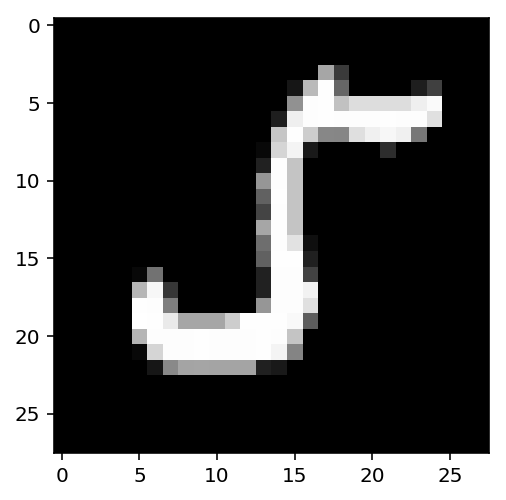

In [32]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [33]:
# Flatten the input images
#(64, -1)
inputs = images.view(images.shape[0], -1)

hidden_units = 256
output_units = 10
input_units = 784

# Create parameters
###### First layers parameters
w1 = torch.randn(input_units, hidden_units)
b1 = torch.randn(hidden_units)

##### Hidden layer parameters
w2 = torch.randn(hidden_units, output_units)
b2 = torch.randn(output_units)

#### Results from forward pass from first layer to hidden layer
h = activation(torch.mm(inputs, w1) + b1)
print("h shape:", h.shape)

#### Result from forward pass from hidden layer to output layer
out = torch.mm(h, w2) + b2
print("out shape:", out.shape)


h shape: torch.Size([64, 256])
out shape: torch.Size([64, 10])


In [34]:
probabilities = softmax(out)
print(probabilities[:5])

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1)[:5])

tensor([[ 3.9411e-06,  1.2447e-03,  9.3451e-09,  5.4339e-05,  3.0492e-09,
          3.9256e-01,  4.7735e-13,  1.8354e-11,  6.0613e-01,  3.0045e-08],
        [ 5.2899e-05,  8.3609e-01,  1.1175e-10,  2.1383e-07,  1.0052e-04,
          2.9966e-05,  3.5729e-11,  1.8943e-13,  9.8024e-05,  1.6363e-01],
        [ 3.3316e-08,  9.9999e-01,  8.8505e-13,  3.7791e-09,  3.0697e-09,
          8.0559e-06,  3.6535e-12,  1.6942e-14,  2.3538e-08,  6.5542e-10],
        [ 1.4707e-07,  5.6268e-05,  3.1006e-13,  1.3652e-08,  1.2167e-09,
          8.8982e-11,  3.0081e-12,  1.1456e-11,  9.9994e-01,  3.9359e-07],
        [ 1.7945e-04,  9.9789e-01,  1.0663e-10,  1.0173e-05,  2.0047e-06,
          1.9164e-03,  4.0400e-11,  1.1373e-08,  2.6123e-07,  2.4504e-09]])
torch.Size([64, 10])
tensor([ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000])


## MNIST Beispiel mit der Klasse `nn.Module`

In [35]:
from torch import nn

In [40]:
class SimpleClassfier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation        
        self.hidden = nn.Linear(784, 256)#input and output size
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)      
        return x

In [41]:
# Create the network and look at it's text representation
model = SimpleClassfier()
model

SimpleClassfier(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

## Variante mit `torch.nn.functional`

In [44]:
import torch.nn.functional as F
# Mit Sigmoid and Softmax
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [51]:
# Mit Relu und Softmax
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Parameter initialisieren

Die Gewichte und der Bias werden automatisch initialisiert, können trotzdem personalisiert werden:

In [52]:
model.fc1.weight

Parameter containing:
tensor([[ 2.2268e-02,  3.1244e-02, -1.5004e-02,  ...,  1.1351e-02,
         -2.5556e-02, -2.1181e-02],
        [-8.7756e-04, -3.1438e-02,  1.6955e-02,  ...,  2.1157e-02,
         -1.5256e-02, -1.9441e-02],
        [ 2.0971e-02, -1.6673e-02,  7.4512e-03,  ..., -1.0724e-02,
         -2.1728e-02, -3.5795e-03],
        ...,
        [ 1.7392e-02, -1.7620e-02, -2.7304e-02,  ..., -1.3476e-02,
          1.4726e-03, -1.1709e-02],
        [-1.0749e-02,  1.3674e-03,  2.7770e-02,  ..., -2.7808e-02,
          3.3242e-03, -3.4681e-02],
        [ 3.2570e-02, -1.1448e-03,  3.2577e-02,  ..., -2.9225e-02,
          1.3131e-02, -3.1479e-02]])

In [53]:
model.fc1.bias

Parameter containing:
tensor(1.00000e-02 *
       [-2.9476, -1.6945, -1.7315,  1.7161, -1.5458,  0.9347,  3.3525,
        -1.5016,  3.4471, -1.3533, -1.1077,  0.6476,  3.2982, -0.1693,
         1.6981,  1.0001, -3.3756,  2.8798,  3.5346,  0.0912,  0.6821,
        -1.6900,  2.8774, -3.2484, -2.8325,  0.2214, -2.1882,  2.1214,
        -1.7948,  1.8477, -2.0049,  2.3252, -2.1875,  1.6018, -1.6849,
        -1.9299,  2.7897, -0.8187, -0.3261, -3.0060,  3.2150, -3.3113,
         0.2423,  0.5109,  1.0650,  3.3394, -2.7960, -1.5907,  0.5816,
         2.3298,  0.9415,  1.7032, -2.3315,  1.9818,  2.3622, -1.1404,
         3.0675, -1.7159,  2.2070,  3.4604, -3.0717,  0.4928, -2.3739,
        -2.8487,  0.9645, -0.6618, -3.1186, -3.2274,  1.2749,  2.8147,
         3.4619,  2.4279,  2.8363, -1.9232, -1.0558,  0.7491,  2.7404,
         1.3361, -3.2746, -0.9868,  2.4208, -3.0544, -2.4157,  1.5769,
        -2.2195,  3.5337, -2.7887, -2.4491, -0.6054, -1.0552, -3.2658,
        -2.4596, -2.8413,  0.2024,

### Personalisierung der Parameter

In [54]:
model.fc1.bias.data.fill_(0) # Daten werden über der .data.methode geändert!

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [55]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 1.4885e-02,  1.0539e-02,  8.1958e-03,  ...,  3.6954e-03,
          1.9690e-02,  8.1124e-03],
        [-3.6822e-03,  6.5889e-04, -2.5098e-03,  ...,  1.2613e-03,
         -1.3896e-02,  5.9601e-03],
        [-6.3177e-03,  3.1760e-03, -2.2210e-04,  ..., -1.1846e-02,
          3.6636e-03, -7.7189e-03],
        ...,
        [ 1.2799e-02, -1.2268e-02,  7.3832e-03,  ...,  7.4217e-03,
         -9.1905e-03,  1.6978e-02],
        [-6.5307e-03,  5.2371e-03,  1.6842e-02,  ...,  2.9333e-04,
          1.9181e-03, -7.5192e-04],
        [-5.9445e-03,  5.5083e-03, -1.7880e-02,  ...,  9.9185e-03,
          1.0426e-02, -1.2740e-02]])

### Forward pass

torch.Size([64, 1, 784])


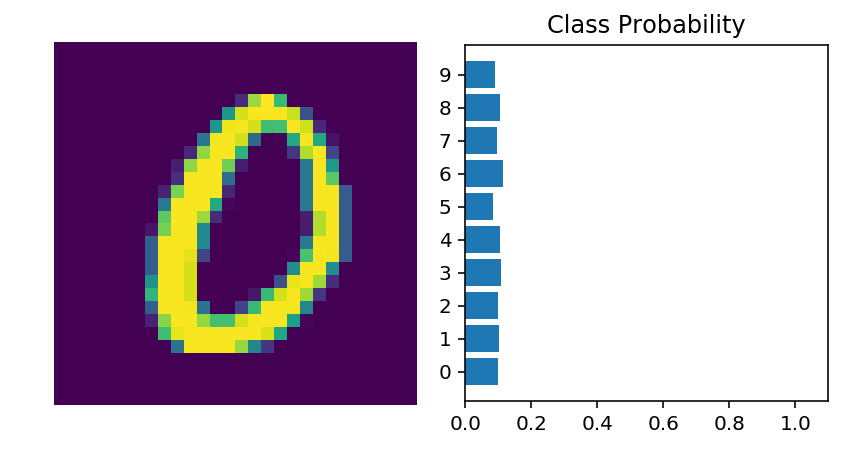

In [56]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
print(images.shape)
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps) # Das Netzwerk hat noch nichts gelernt :-)

## Modelldefinition mit der Klasse  `nn.Sequential`

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)
Linear(in_features=784, out_features=128, bias=True)


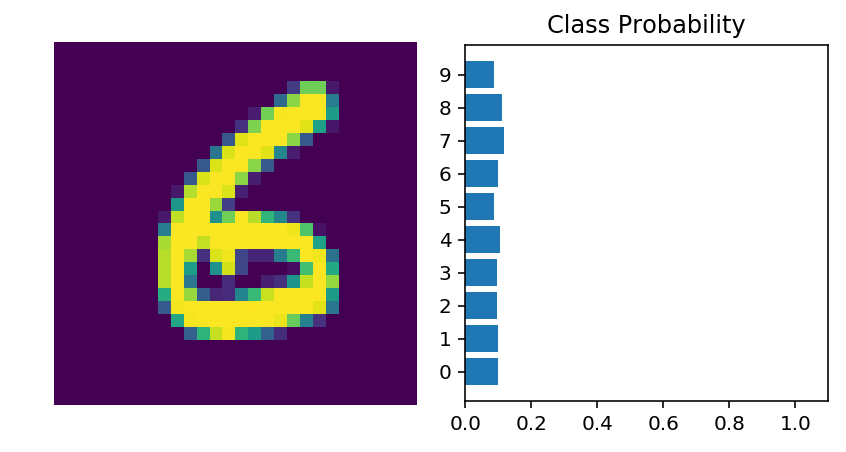

In [65]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
#Beschreibung des Modells
print(model)
# Zugriff auf einzelne Charakteristika von diesem Modell:
print(model[0])

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [72]:
print("Gewichte - 1. Lineare Transformation:\n", model[0].weight)
print("Gewichte - 2. Lineare Transformation:\n", model[2].weight)


Gewichte - 1. Lineare Transformation:
 Parameter containing:
tensor([[ 1.7094e-02, -1.2565e-02,  2.8740e-02,  ...,  5.0831e-03,
          3.7749e-03,  1.5662e-02],
        [-2.1879e-03,  3.4317e-03, -2.0191e-02,  ...,  3.2185e-03,
          1.4870e-02, -3.8079e-03],
        [ 1.7111e-02, -7.6203e-03, -1.6212e-02,  ..., -1.5212e-02,
         -1.9853e-03,  2.7800e-03],
        ...,
        [ 2.2333e-02,  1.4166e-02, -1.4702e-02,  ...,  2.3467e-02,
         -2.7305e-02, -3.5227e-02],
        [ 9.0937e-04,  9.4602e-03, -1.1592e-02,  ..., -2.1317e-02,
         -2.1642e-02, -3.1545e-03],
        [ 2.1936e-02,  2.4996e-02, -1.0947e-02,  ...,  8.2856e-03,
         -1.5404e-02, -1.8823e-02]])
Gewichte - 2. Lineare Transformation:
 Parameter containing:
tensor(1.00000e-02 *
       [[-5.0022,  6.6380, -6.8003,  ...,  7.4414, -2.9872,  7.1819],
        [-7.0598, -4.3393, -2.4574,  ...,  6.5269, -7.6664, -3.4802],
        [ 8.4272,  8.4968,  7.8261,  ..., -7.9162, -7.6910, -4.4370],
        ...,
  

In [71]:
print("Gewichte - Output:\n", model[4].weight)

Gewichte - Output:
 Parameter containing:
tensor([[-0.0413,  0.0001, -0.0751,  0.0993, -0.0244,  0.0251, -0.1236,
          0.0906,  0.1178, -0.0877, -0.1060,  0.0450, -0.1145,  0.0070,
          0.0407,  0.0679,  0.1050, -0.0894, -0.0912, -0.0518, -0.0061,
         -0.0582, -0.0398, -0.0853, -0.1198,  0.0669, -0.1153, -0.0407,
         -0.0835,  0.1235,  0.1163, -0.0773,  0.0038, -0.0123,  0.0420,
          0.0520, -0.0087, -0.0222, -0.0202, -0.0969,  0.0620,  0.0054,
         -0.0629,  0.0026,  0.1159, -0.1063,  0.0846,  0.1224, -0.0805,
          0.0520,  0.0100, -0.0842,  0.0960, -0.0675, -0.0342,  0.1187,
          0.0657,  0.0812,  0.0811, -0.0464,  0.1122, -0.0834,  0.0560,
         -0.0985],
        [ 0.0273,  0.0245, -0.0008,  0.0810,  0.1155, -0.1001,  0.0315,
         -0.0807,  0.0663, -0.0474,  0.0171,  0.0560,  0.0633,  0.0010,
          0.0984,  0.1179, -0.0131, -0.0478, -0.0237,  0.0843, -0.0875,
          0.0563,  0.0975,  0.0410,  0.0066, -0.0279, -0.0450, -0.1005,
   

In [73]:
print("Bias - Output:\n", model[4].bias)

Bias - Output:
 Parameter containing:
tensor([ 0.0261, -0.1060,  0.1111, -0.0327,  0.0952, -0.0191, -0.0464,
        -0.0178,  0.0573, -0.0922])


## Modelldefinition  mit `nn.Sequential` und Pipeline als `OrderedDict`

In [74]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [75]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


### Training the neural network

Training multilayer networks is done through **backpropagation** which is really just an application of the chain rule from calculus. It's easiest to understand if we convert a two layer network into a graph representation.

<img src='assets/backprop_diagram.png' width=550px>

In the forward pass through the network, our data and operations go from bottom to top here. We pass the input $x$ through a linear transformation $L_1$ with weights $W_1$ and biases $b_1$. The output then goes through the sigmoid operation $S$ and another linear transformation $L_2$. Finally we calculate the loss $\ell$. We use the loss as a measure of how bad the network's predictions are. The goal then is to adjust the weights and biases to minimize the loss.

To train the weights with gradient descent, we propagate the gradient of the loss backwards through the network. Each operation has some gradient between the inputs and outputs. As we send the gradients backwards, we multiply the incoming gradient with the gradient for the operation. Mathematically, this is really just calculating the gradient of the loss with respect to the weights using the chain rule.

$$
\large \frac{\partial \ell}{\partial W_1} = \frac{\partial L_1}{\partial W_1} \frac{\partial S}{\partial L_1} \frac{\partial L_2}{\partial S} \frac{\partial \ell}{\partial L_2}
$$

**Note:** I'm glossing over a few details here that require some knowledge of vector calculus, but they aren't necessary to understand what's going on.

We update our weights using this gradient with some learning rate $\alpha$. 

$$
\large W^\prime_1 = W_1 - \alpha \frac{\partial \ell}{\partial W_1}
$$

The learning rate $\alpha$ is set such that the weight update steps are small enough that the iterative method settles in a minimum.

### Kostenfunktionen in PyTorch

Through the `nn` module, PyTorch provides losses such as the cross-entropy loss (`nn.CrossEntropyLoss`). You'll usually see the loss assigned to `criterion`. As noted in the last part, with a classification problem such as MNIST, we're using the softmax function to predict class probabilities. With a softmax output, you want to use cross-entropy as the loss. To actually calculate the loss, you first define the criterion then pass in the output of your network and the correct labels.

Something really important to note here. Looking at [the documentation for `nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss),

> This criterion combines `nn.LogSoftmax()` and `nn.NLLLoss()` in one single class.
>
> The input is expected to contain scores for each class.

This means we need to pass in the raw output of our network into the loss, not the output of the softmax function. This raw output is usually called the *logits* or *scores*. We use the logits because softmax gives you probabilities which will often be very close to zero or one but floating-point numbers can't accurately represent values near zero or one ([read more here](https://docs.python.org/3/tutorial/floatingpoint.html)). It's usually best to avoid doing calculations with probabilities, typically we use log-probabilities.

In [76]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [77]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2825)


In [78]:
# Build a feed-forward network - SALTA!!!
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3326)


# 4. Autograd: Berechnung der lokalen Ableitung

Torch provides a module, `autograd`, for automatically calculating the gradients of tensors. We can use it to calculate the gradients of all our parameters with respect to the loss. Autograd works by keeping track of operations performed on tensors, then going backwards through those operations, calculating gradients along the way. To make sure PyTorch keeps track of operations on a tensor and calculates the gradients, you need to set `requires_grad = True` on a tensor. You can do this at creation with the `requires_grad` keyword, or at any time with `x.requires_grad_(True)`.

You can turn off gradients for a block of code with the `torch.no_grad()` content:
```python
x = torch.zeros(1, requires_grad=True)
>>> with torch.no_grad():
...     y = x * 2
>>> y.requires_grad
False
```

Also, you can turn on or off gradients altogether with `torch.set_grad_enabled(True|False)`.

The gradients are computed with respect to some variable `z` with `z.backward()`. This does a backward pass through the operations that created `z`.

In [45]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-0.0887, -0.2961],
        [-1.3091, -1.2157]])


In [46]:
y = x**2
print(y)

tensor([[ 0.0079,  0.0877],
        [ 1.7137,  1.4780]])


In [47]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [48]:
z = y.mean()
print(z)

tensor(0.8218)


In [49]:
print(x.grad)

None


To calculate the gradients, you need to run the `.backward` method on a Variable, `z` for example. This will calculate the gradient for `z` with respect to `x`

$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$$

In [50]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.0443, -0.1481],
        [-0.6545, -0.6079]])
tensor([[-0.0443, -0.1481],
        [-0.6545, -0.6079]])


### Loss + Autograd

When we create a network with PyTorch, all of the parameters are initialized with `requires_grad = True`. This means that when we calculate the loss and call `loss.backward()`, the gradients for the parameters are calculated. These gradients are used to update the weights with gradient descent. Below you can see an example of calculating the gradients using a backwards pass.

In [90]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [91]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor(1.00000e-02 *
       [[-0.0092, -0.0092, -0.0092,  ..., -0.0092, -0.0092, -0.0092],
        [ 0.1415,  0.1415,  0.1415,  ...,  0.1415,  0.1415,  0.1415],
        [ 0.0695,  0.0695,  0.0695,  ...,  0.0695,  0.0695,  0.0695],
        ...,
        [-0.0072, -0.0072, -0.0072,  ..., -0.0072, -0.0072, -0.0072],
        [ 0.1609,  0.1609,  0.1609,  ...,  0.1609,  0.1609,  0.1609],
        [-0.5520, -0.5520, -0.5520,  ..., -0.5520, -0.5520, -0.5520]])


### Training des Netzwerks

There's one last piece we need to start training, an optimizer that we'll use to update the weights with the gradients. We get these from PyTorch's [`optim` package](https://pytorch.org/docs/stable/optim.html). For example we can use stochastic gradient descent with `optim.SGD`. You can see how to define an optimizer below.

In [92]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

Now we know how to use all the individual parts so it's time to see how they work together. Let's consider just one learning step before looping through all the data. The general process with PyTorch:

* Make a forward pass through the network 
* Use the network output to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

Below I'll go through one training step and print out the weights and gradients so you can see how it changes. Note that I have a line of code `optimizer.zero_grad()`. When you do multiple backwards passes with the same parameters, the gradients are accumulated. This means that you need to zero the gradients on each training pass or you'll retain gradients from previous training batches.

In [93]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 2.7405e-02, -2.3313e-02,  2.4741e-02,  ..., -2.9478e-02,
          2.8822e-02, -1.5945e-02],
        [ 1.8072e-02,  1.9560e-02,  5.8446e-03,  ...,  1.3900e-02,
         -1.6550e-02, -2.7815e-02],
        [ 2.4488e-02, -1.5766e-02, -2.7425e-02,  ...,  2.3958e-02,
         -1.6385e-02,  2.4055e-02],
        ...,
        [ 1.9362e-02, -7.9311e-03, -3.3803e-02,  ...,  1.3076e-02,
          3.0228e-02,  1.2528e-02],
        [-1.2199e-02,  2.2592e-02,  4.9968e-03,  ..., -5.3004e-03,
         -2.6536e-02, -2.6353e-02],
        [-2.1454e-02, -1.5151e-02,  2.3111e-02,  ..., -1.5734e-02,
          7.9230e-03,  6.7673e-03]])
Gradient - tensor(1.00000e-02 *
       [[ 0.0874,  0.0874,  0.0874,  ...,  0.0874,  0.0874,  0.0874],
        [-0.1629, -0.1629, -0.1629,  ..., -0.1629, -0.1629, -0.1629],
        [ 0.1069,  0.1069,  0.1069,  ...,  0.1069,  0.1069,  0.1069],
        ...,
        [ 0.0112,  0.0112,  0.0112,  ...,  0.0112,  0.0112,  0.0112],
  

In [94]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 2.7396e-02, -2.3321e-02,  2.4732e-02,  ..., -2.9487e-02,
          2.8813e-02, -1.5954e-02],
        [ 1.8088e-02,  1.9576e-02,  5.8609e-03,  ...,  1.3917e-02,
         -1.6534e-02, -2.7799e-02],
        [ 2.4477e-02, -1.5777e-02, -2.7436e-02,  ...,  2.3947e-02,
         -1.6396e-02,  2.4044e-02],
        ...,
        [ 1.9361e-02, -7.9322e-03, -3.3804e-02,  ...,  1.3075e-02,
          3.0227e-02,  1.2527e-02],
        [-1.2184e-02,  2.2608e-02,  5.0122e-03,  ..., -5.2849e-03,
         -2.6520e-02, -2.6338e-02],
        [-2.1467e-02, -1.5164e-02,  2.3098e-02,  ..., -1.5748e-02,
          7.9099e-03,  6.7542e-03]])


### Training for real

In [133]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      #nn.LogSoftmax(dim=1)
                      nn.Softmax(dim=1))

criterion = nn.CrossEntropyLoss() #NNLoss?
optimizer = optim.SGD(model.parameters(), lr=0.03)

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.104218440015179
Training loss: 1.7219267068132917
Training loss: 1.6472923005821862
Training loss: 1.6331659341926006
Training loss: 1.626022983461555
Training loss: 1.6211538275421808
Training loss: 1.6175139120646886
Training loss: 1.6145997114781379
Training loss: 1.6119669875356435
Training loss: 1.6095867456911979
Training loss: 1.5833493093691908
Training loss: 1.549466683539246
Training loss: 1.5424435408130637
Training loss: 1.537752206518706
Training loss: 1.5341637037964517


tensor([[ 7.2524e-06,  3.6554e-08,  2.8927e-10,  4.9965e-09,  2.1020e-06,
          9.7903e-01,  2.1268e-09,  1.9853e-02,  1.1021e-03,  8.8849e-06]])


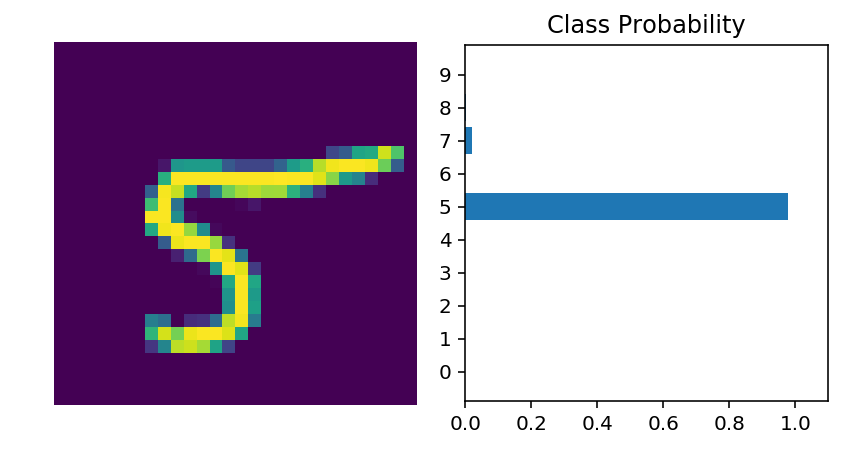

In [137]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    #logps = model.forward(img) #With LogSoftmax
    ps = model.forward(img)
    
print(ps)    
# Output of the network are logits, need to take softmax for probabilities
#ps = torch.exp(logps)
#print(ps)
helper.view_classify(img.view(1, 28, 28), ps)

In [130]:
## Nur fuer mich, zu entscheiden für Präsi
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.CrossEntropyLoss() #NNLoss?
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 1.8822479600082838
Training loss: 0.8121594862261815
Training loss: 0.5193287356575923
Training loss: 0.42971233099000034
Training loss: 0.3862595110337363


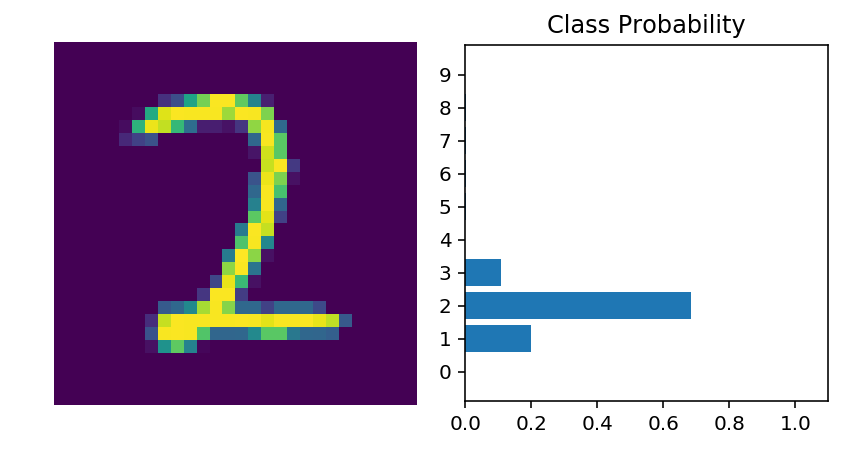

In [131]:
## Nur fuer mich, zu entscheiden für Präsi
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img) #With LogSoftmax
    #ps = model.forward(img)   

#Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
#print(ps)
helper.view_classify(img.view(1, 28, 28), ps)

### Training mit Validierung

In [140]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [141]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [142]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [143]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 2],
        [ 4],
        [ 4],
        [ 4],
        [ 4],
        [ 1]])


In [145]:
equals = top_class == labels.view(*top_class.shape)

accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 14.0625%


In [146]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.340..  Test Loss: 0.207..  Test Accuracy: 0.934
Epoch: 2/30..  Training Loss: 0.166..  Test Loss: 0.152..  Test Accuracy: 0.954
Epoch: 3/30..  Training Loss: 0.139..  Test Loss: 0.117..  Test Accuracy: 0.965
Epoch: 4/30..  Training Loss: 0.118..  Test Loss: 0.141..  Test Accuracy: 0.958
Epoch: 5/30..  Training Loss: 0.104..  Test Loss: 0.133..  Test Accuracy: 0.962
Epoch: 6/30..  Training Loss: 0.097..  Test Loss: 0.133..  Test Accuracy: 0.960
Epoch: 7/30..  Training Loss: 0.087..  Test Loss: 0.123..  Test Accuracy: 0.965
Epoch: 8/30..  Training Loss: 0.086..  Test Loss: 0.128..  Test Accuracy: 0.963
Epoch: 9/30..  Training Loss: 0.079..  Test Loss: 0.104..  Test Accuracy: 0.974
Epoch: 10/30..  Training Loss: 0.078..  Test Loss: 0.123..  Test Accuracy: 0.968
Epoch: 11/30..  Training Loss: 0.072..  Test Loss: 0.107..  Test Accuracy: 0.973
Epoch: 12/30..  Training Loss: 0.068..  Test Loss: 0.122..  Test Accuracy: 0.969
Epoch: 13/30..  Training Loss: 0.065.

In [147]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

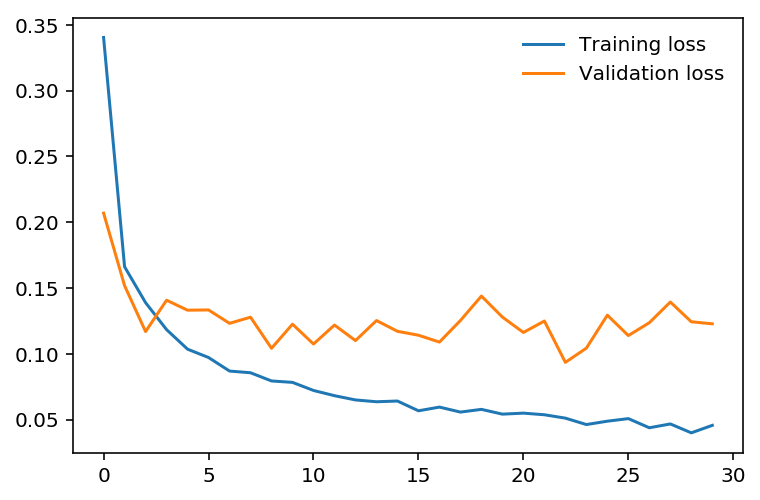

In [148]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

# 4. CNN in pyTorch

# 1. Installation

Installation can be easily done through the official website:  https://pytorch.org/. Simply select OS, python version and if you want the GPU (with CUDA) or the CPU version.

### 1.2 Installation Check

In [1]:
import torch
print("Torch version:", torch.__version__)
print("CUDA is active:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

Torch version: 0.4.1
CUDA is active: True
CUDA version: 9.0


## 2. PyTorch Fundamentals - Matrices and Tensors

### NumPy vs. PyTorch

In [2]:
#### With values ####
#Python array
arr = [[1,2], [3,4]]
#Numpy
import numpy as np

#Bidimensional array
numpy_arr = np.array([[1,2], [3,4]])
print("Numpy array:\n", numpy_arr)

#Torch
import torch
arr_t = torch.Tensor(arr)#Conversion to torch array
print("Torch array:\n", arr_t)
##### With default values #####
print("Numpy array of ones:\n", np.ones((2,2)))
print("Torch array of ones:\n", torch.ones((2,2)))

#### With random values ####
print("Numpy array of random int:\n", np.random.rand(2,2))
print("Torch array of random int:\n", torch.rand(2,2))

Numpy array:
 [[1 2]
 [3 4]]
Torch array:
 tensor([[1., 2.],
        [3., 4.]])
Numpy array of ones:
 [[1. 1.]
 [1. 1.]]
Torch array of ones:
 tensor([[1., 1.],
        [1., 1.]])
Numpy array of random int:
 [[0.22712468 0.1864801 ]
 [0.98675439 0.86452921]]
Torch array of random int:
 tensor([[0.6608, 0.7621],
        [0.0416, 0.7732]])


### Reproducibility with Seeds

In [3]:
######## Seeds in numpy 
print("Seeds in numpy:\n")
np.random.seed(0)
print(np.random.rand(2,2))

####### Seeds in torch (CPU)
torch.manual_seed(0)
print(torch.rand(2,2))

###### Seeds in torch (GPU)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
    print(torch.rand(2,2))

Seeds in numpy:

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]]
tensor([[0.4963, 0.7682],
        [0.0885, 0.1320]])
tensor([[0.3074, 0.6341],
        [0.4901, 0.8964]])


### NumPy-PyTorch Bridge

Torch supports following data types:
double, float, float16, int64, int32, and uint8.
//TODO: Inserisci tabella

#### From NumPy to Torch

In [4]:
#Numpy array
np_array = np.ones((2,2))

#Torch tensor
torch_tensor = torch.from_numpy(np_array)
print(torch_tensor)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)


Data types matter in pyTorch:

In [5]:
#Data types matter!
np_array2 = np.ones((2,2), dtype=np.int8)
try:
    torch.from_numpy(np_array2)
except TypeError as e:
    print("TypeError:",e)

TypeError: can't convert np.ndarray of type numpy.int8. The only supported types are: double, float, float16, int64, int32, and uint8.


In [6]:
np_array3 = np.ones((2,2), dtype=np.int64)
torch.from_numpy(np_array3)

tensor([[1, 1],
        [1, 1]])

#### PyTorch to NumPy

In [7]:
#Torch tensor
torch_tensor2 = torch.ones(2,2)
print(type(torch_tensor2))
torch_to_numpy = torch_tensor2.numpy()
print(type(torch_to_numpy))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


#### Tesors on CPU vs GPU

In [8]:
#CPU
tensor_cpu = torch.ones(2,2)

In [9]:
#CPU to GPU
if torch.cuda.is_available():
    tensor_cpu.cuda()
    print(tensor_cpu)

tensor([[1., 1.],
        [1., 1.]])


In [10]:
#GPU to CPU
tensor_cpu.cpu()

tensor([[1., 1.],
        [1., 1.]])

#### Tensor Dimensions

In [11]:
#### Resizing a tensor
a = torch.ones(2,2)
print("Tensor dimension:")
print("shape variable:", a.shape)
print("size()-method", a.size())

### view()
print("Resized tensor:", a.view(4))
print("Dimension:", a.view(4).size())

Tensor dimension:
shape variable: torch.Size([2, 2])
size()-method torch.Size([2, 2])
Resized tensor: tensor([1., 1., 1., 1.])
Dimension: torch.Size([4])


#### Tensor Element-wise Operations

In [12]:
a = torch.ones(2,2)
b = torch.ones(2,2)

### Addition (element-wise)
add = a+b 
add2 = torch.add(a,b)
print(add)
print(add2)

#In-place addition
print()
add.add_(a)
print(add)

#### Subtraction
print(a-b)
print(a.sub(b))
print("A:\n",a)
print()
#In place
print(a.sub_(b))
print("A:\n",a)


tensor([[2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.]])

tensor([[3., 3.],
        [3., 3.]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[0., 0.],
        [0., 0.]])
A:
 tensor([[1., 1.],
        [1., 1.]])

tensor([[0., 0.],
        [0., 0.]])
A:
 tensor([[0., 0.],
        [0., 0.]])


### Gradients - Parameter "requires_grad"

In [13]:
### Creating a tensor with gradient which allow the accumulation of gradients
a_grad = torch.ones((2,2), requires_grad=True)
a_grad

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [14]:
# Behaves similarly to tensors
b_grad = torch.ones((2, 2), requires_grad=True)
print(a_grad + b_grad)
print(torch.add(a_grad, b_grad))

tensor([[2., 2.],
        [2., 2.]], grad_fn=<ThAddBackward>)
tensor([[2., 2.],
        [2., 2.]], grad_fn=<ThAddBackward>)


**What is exactly `requires_grad`?**

Define a function:
$$y_i = 5(x_i+1)^2$$

In [15]:
# x value
x = torch.ones(2, requires_grad=True)
print("x:", x)
print(x.requires_grad)

x: tensor([1., 1.], requires_grad=True)
True


In [16]:
y_test = torch.ones(2)*5
print(y_test.requires_grad)
y = 5* (x + 1) ** 2
print("y:", y)
print(y.requires_grad)

False
y: tensor([20., 20.], grad_fn=<MulBackward>)
True


**Backward should be called only on a scalar (i.e. 1-element tensor) or with gradient w.r.t. the variable**
- Let's reduce y to a scalar then...

$$o = \frac{1}{2}\sum_i y_i$$

In [17]:
o = (1/2) * torch.sum(y)
o

tensor(20., grad_fn=<MulBackward>)

<center> **Recap `y` equation**: $y_i = 5(x_i+1)^2$ </center>
<center> **Recap `o` equation**: $o = \frac{1}{2}\sum_i y_i$ </center>
<center> **Substitute `y` into `o` equation**: $o = \frac{1}{2} \sum_i 5(x_i+1)^2$ </center>
$$\frac{\partial o}{\partial x_i} = \frac{1}{2}[10(x_i+1)]$$
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{1}{2}[10(1 + 1)] = \frac{10}{2}(2) = 10$$

In [18]:
o.backward

<bound method Tensor.backward of tensor(20., grad_fn=<MulBackward>)>

In [20]:
x.grad

## 3. Feedforward Neural Network with PyTorch (MNIST)

In [21]:
import torch
import torch.nn as nn

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1: Loading MNIST Train Dataset

In [22]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [23]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

Processing...
Done!


### Step 2: Make Dataset Iterable

In [24]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### Step 3: Create Model Class

In [25]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

### Step 4: Instantiate Model Class
- **Input** dimension: **784** 
    - Size of image
    - $28 \times 28 = 784$
- **Output** dimension: **10**
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
- **Hidden** dimension: **100**
    - Can be any number
    - Similar term
        - Number of neurons
        - Number of non-linear activation functions
        
Our model will have 1 hidden layer and **sigmoid** activation.        

In [26]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

### Step 5: Instantiate Loss Class
- Feedforward Neural Network: **Cross Entropy Loss**
    - _Logistic Regression_: **Cross Entropy Loss**
    - _Linear Regression_: **MSE**
   

In [27]:
criterion = nn.CrossEntropyLoss()

### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our tensors with gradient accumulation capabilities)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

In [28]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### Parameters In-Depth

In [30]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

###### IMMAGINE?

<generator object Module.parameters at 0x0000021F25700C78>
4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


### Step 7: Train Model
- Process 
    1. Convert inputs to tensors with gradient accumulation capabilities
    2. Clear gradient buffers
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [32]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.595485508441925. Accuracy: 86
Iteration: 1000. Loss: 0.5494940876960754. Accuracy: 89
Iteration: 1500. Loss: 0.45526909828186035. Accuracy: 90
Iteration: 2000. Loss: 0.4022116959095001. Accuracy: 91
Iteration: 2500. Loss: 0.22733356058597565. Accuracy: 91
Iteration: 3000. Loss: 0.27196046710014343. Accuracy: 91


## 4. Convolutional Neural Networks in PyTorch

## Quellen

1. Deep Learning Wizard: https://www.deeplearningwizard.com/deep_learning/intro/ (images, explanations, examples..)
2. Siraj Raval, "Pytorch in 5 Minutes": https://www.youtube.com/watch?v=nbJ-2G2GXL0 (very quick start)
3. Udacity, Intro to Deep Learning with PyTorch: https://www.udacity.com/course/deep-learning-pytorch--ud188
